## Basic Image Processing

Images can be represented as matrix form in computers. The values of this matrix may correspond to pixel intensities. A pixel of an image is same as a component of a matrix.

2D images have weight and height dimensions as well as matrices.

Also images have color spaces. An image can be either gray scaled or colored. A gray scaled image has one channel with weight and height dimensions, also a colored image has 3 channels with weight and height dimensions. In colored image's channels generally correspond to **(R)ed**, **(G)ray** and **(B)lue**. Thus, colored images oftenly denoted as RGB images. Let's start with gray scale images:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('./img/lena.png',0)
print(img1.shape)
print(type(img1))
print(img1)

(567, 567)
<class 'numpy.ndarray'>
[[159 159 157 ... 167 151 118]
 [159 159 157 ... 167 151 118]
 [159 159 157 ... 167 151 118]
 ...
 [ 20  28  24 ...  90  86  84]
 [ 22  34  30 ...  90  92  96]
 [ 22  34  30 ...  90  92  96]]


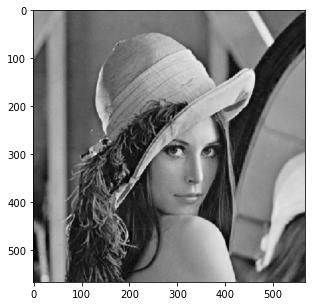

In [14]:
fig = plt.figure(figsize=(5,5))
plt.imshow(img1,cmap='gray')
plt.show()

RGB images:

In [23]:
img2 = cv2.imread('./img/rgb1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
print(img2.shape)
print(type(img2))
print('First channel: ',img2[:,:,0])
print('Second channel: ',img2[:,:,1])
print('Third channel: ',img2[:,:,2])

(1300, 1000, 3)
<class 'numpy.ndarray'>
First channel:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Second channel:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Third channel:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


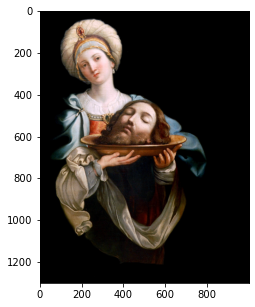

In [20]:
fig = plt.figure(figsize=(5,5))
plt.imshow(img2)
plt.show()

## Kernels

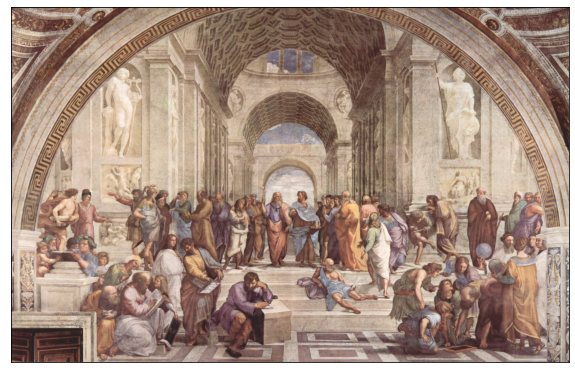

In [78]:
img3 = cv2.imread('./img/kernel.jpeg')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.show()

Cool, now let’s make a kernel for blurring the image.

In [79]:
kernel1 = kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
kernel1

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

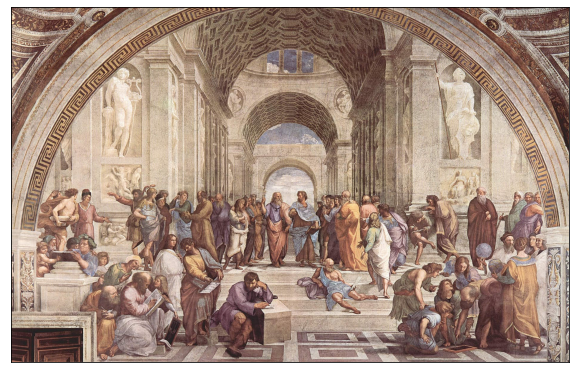

In [80]:
img3_1 = cv2.filter2D(img3, -1, kernel1)
fig = plt.figure(figsize=(10,10))
plt.imshow(img3_1)
plt.xticks([])
plt.yticks([])
plt.show()

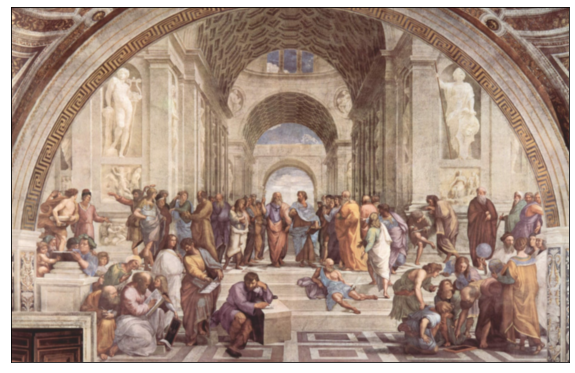

In [81]:
img3_2 = cv2.blur(img3, (5,5))
fig = plt.figure(figsize=(10,10))
plt.imshow(img3_2)
plt.xticks([])
plt.yticks([])
plt.show()

In [82]:
kernel3 = kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
kernel3

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

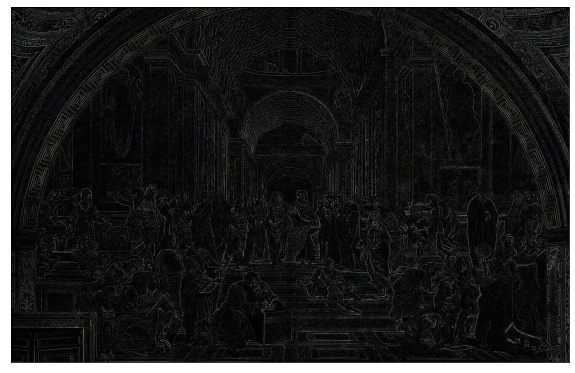

In [83]:
img3_3 = cv2.filter2D(img3, -1, kernel3)
fig = plt.figure(figsize=(10,10))
plt.imshow(img3_3)
plt.xticks([])
plt.yticks([])
plt.show()

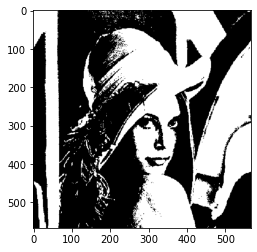

In [6]:
img1 = cv2.imread('./img/lena.png',0)
_, th = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
plt.imshow(th,cmap='gray')

# Convolutional Neural Networks

Convolutional Neural Networks was proposed by Yann Lecun in 1989. CNNs are
specialized kind of neural networks for processing data that has a know, gird-like topology.
Examples include time-series data, which can be thought of as a 1D grid taking samples
at regular time intervals, and image data, which can be thought as a 2D grid of pixels.
CNNs are a category of Neural Networks that have proven very effective in areas such as
image recognition and classification. The vast majority of applications of CNNs focus on
image data, although one can also ose these networks for all types of temporal, spatial and
spatiotemporal data

Early motivation for CNNs was derived from experiments by Hubel and Wiesel on a cat’s
visual cortex. The visual cortex has small regions of cells that are sensitive to specific
regions in the visual field. In other words, if the specific areas of the visual field are
excited, then those cells in the visual cortex will be activated as well. For example, vertical
edges cause some neuronal cells to excited, whereas horizontal edges cause other neuronal
cells to be excited. The cells are connected using layered architecture, and this discovery
led to the conjecture that mammals use these different layers to construct portions of
images at different levels of abstraction. From machine learning point of view, this principle
is similiar to that hierarchical feature extraction. CNNs achieve something similiar by
encoding primitive shapes in earlier layers, and more complex shapes in later layers.

Based on this biological inspirations, the earliest neural model was
the Neocognitron by Kunihiko Fukushima in 1979. However, there were several differences
between this model and the modern CNNs. The most prominent of these differences was that the notion of weight sharing was not used. Based on this architecture, one of the first
fully convolutional architectures, referred to as LeNet-5 was developed by Yann Lecun in
1989

CNNs combine three architectural ideas to ensure some degree of shift, scale, and
distrotion invariance: local receptive fields, shared weights, and spatial or temporal sub-
sampling. Classifying images can be done with an ordinary fully connected feed-forward
network. But there will be problems. Firstly, typical images may contain hundreds or
millions of pixels. This refers to there may be too much dimensions on the input data.
A fully-connected first layer with, say one hundred hidden units in the first layer, would
already contain several tens of thousand weights. Such a large number of parameters in-
creases the capacity of the system and therefore requires a larger training set. In addition,
the memory requirement to strore many weights may rule out certain hardware implemen-
tations. Secondly, a deficiency of fully-connected architectures is that the topology of the
input is entirely ignored. The input variables can be presented in any (fixed) order without
affecting the outcome of the training. On the contrary, images have a strong 2D local struc-
ture: pixels that are spatially or temporally nearby are highly correlated. Local correlations
are the reasons for the well-known advantages of extracting and combining local features
before recognizing spatial or temporal objects, before configurations of neighboring pixels
can be classified into a small number of categories as edges, corners etc.

## Convolution Operator

In mathematics, convolution is a mathematical operation on two or more than two
functions that produces a new function expressing how the shape of one is modified by the
others. Usually, the convolution operation used in CNNs does not correspond precisely to
the definition of convolution as used in other fields such as engineering (signal processing)
or pure mathematics.

Suppose that you are James T. Kirk from Star Trek, and you are captured in a planet, you
want to track the location of USS Enterprise with a laser sensor. The laser sensor provides
a single output $x(t)$, the position of the Enterprise at time $t$. Bot $x$ and $t$ are real-valued,
i.e., you can get a different reading from the laser sensor at any instant time. Now suppose
that your laser sensor is somewhat noisy. 

To obtain a less noisy estimate of the Enterprise’s
position, we would like to average together several measurements. Of course, more recent
measurements are more relevant, so we will want this with a weighted average that gives
more weight to recent measurements. If we apply such as weighted average operation at
every moment, we obtain a new function s providing a smoothed estimate of the position
of spaceship
<font size="4">
$$ s(t) = \int x(t_0) w(t-t_0) dt_0$$
</font>
This operation called convolution, denoted as
<font size="4">
$$s(t) = (x \ast w)(t)$$
</font>

Of course $w$ needs to be a valid probability density function and w needs to be 0 for all
negative arguments, or it will look into the future, which is not okay. But, usually when we
work with data on a computer, time will be discretized, and our sensor will provide data
at regular intervals. In our example, it might be more realistic to assume that our laser
provides a measurement once per second.

The time index $t$ can take on only integer values.
If we now assume that $x$ and $w$ are defined only on integer $t$, we can define the discrete
convolution as:

<font size="4">
$$s(t) = (x \ast w)(t) = \sum_{n= -\infty}^{\infty} x(n)w(t-n)$$
</font>

$w$ is sometimes referred as the kernel and the output of convoluton operator is sometimes
referred as the feature map. Oftenly, convolution operator can be over more than one axis
at a time. For example if we use two-dimesional image $I$ as our input, we probably also use a two-dimensional kernel $K$:

<font size="4">
$$F(i,j) = (I \ast K)(i,j)=\sum_{m}\sum_{n} I(m,n)K(i-m,j-n)$$
</font>

Instead convolution, many neural network libraries implement a related function called the
cross-correlation.
<font size="4">
$$F(i,j) = (I \ast K)(i,j)=\sum_{m}\sum_{n} I(i+m,j+n)K(m,n)$$
</font>

We can think cross-correlation as a Hadamard Product but after the production of input ant the kernel, output of the cross-entropy is the sum of all elements of output of the Hadamard Product

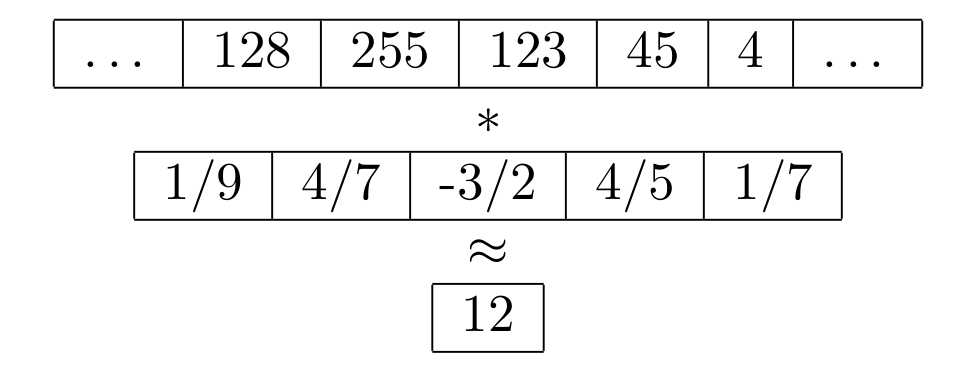

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/cross.png",width=500, height=500)

The convolution on engineering, signal processing is a very large subject to study. It will
be shown more later.

## The Architecture

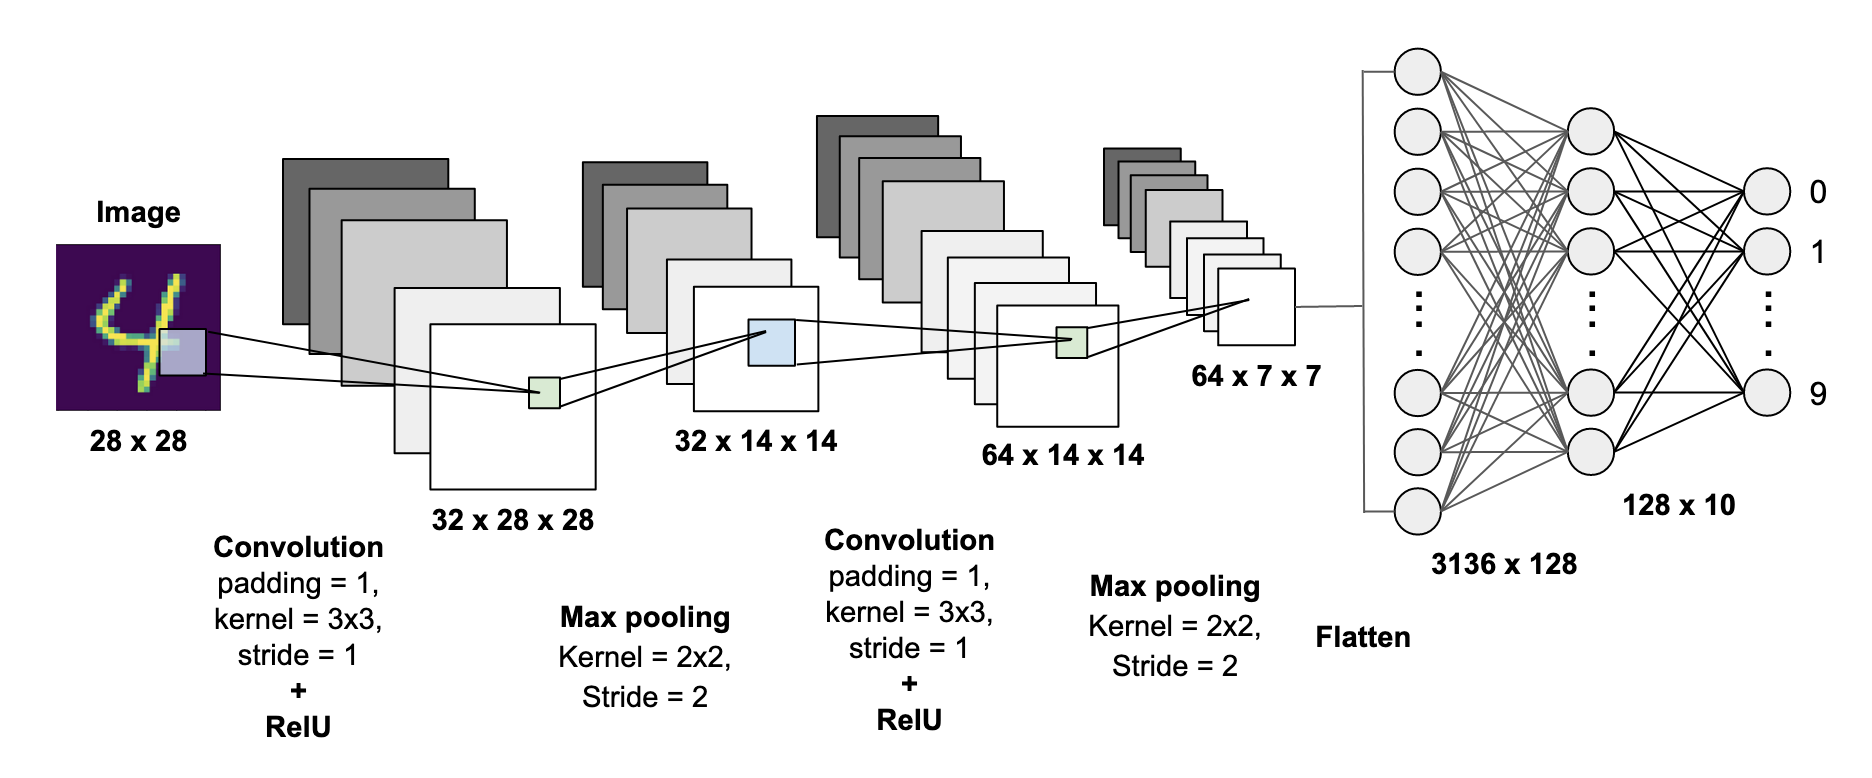

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/mnistarch.png",width=1000, height=1000)

## Architecture Details

### Convolution On Image

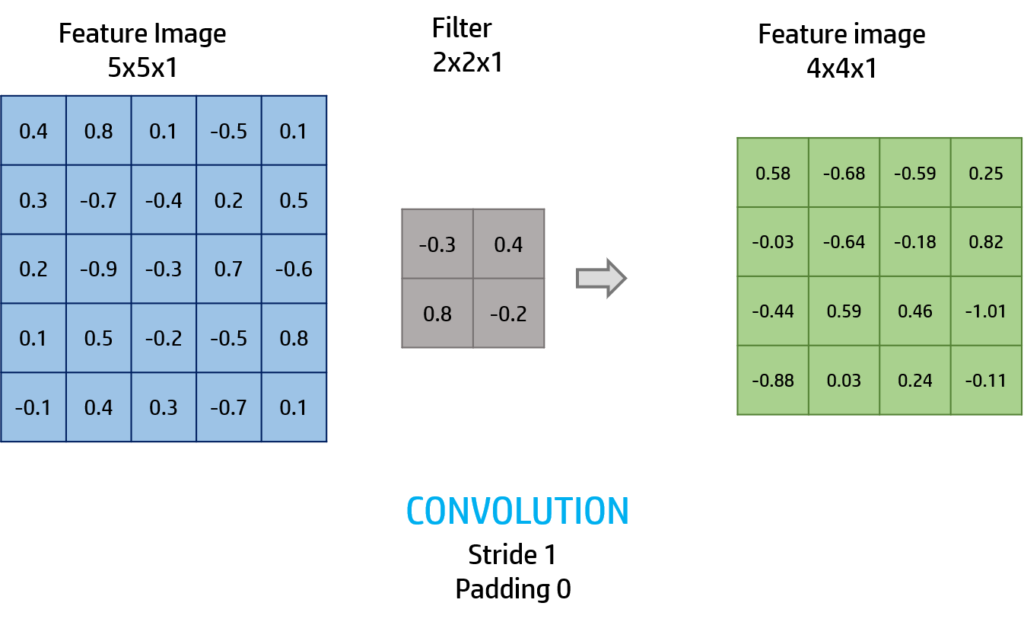

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/convimg.png",width=700, height=500)

### Pooling

A CNN architecture consists three stages. The first one convolution, the second is the non-linear activation, such as ReLU, the third one is pooling (sub-sampling) to modify the output of the layer further. A pooling function replaces the output of the net at a certaion location with a summary of statistic of the nearby outputs. For example the max pooling, was proposed by Zhou and Chellappa in 1988, operation finds the maximum element within a rectangular or square neighborhood. Other popular pooling functions include the average pooling, the $L^2$ norm of a rectangular or square neighborhood, or weighted average pooling based on the discance from the central pixel In all cases, pooling helps to make the representation become approximately invariant to small translations of the input. Invariance to translation means that if we translate the input by small amount, the values of most of the pooled outputs do not change. You can see a Lena example:

In [28]:
import numpy as np
def pool2d(im,kernel,mode='max'):
    kernel0,kernel1 = kernel
    feature_map = 255 * np.ones(shape=(int(im.shape[0]/kernel0)+1,
                                       int(im.shape[1]/kernel1)+1))
    for i in range(0,im.shape[0],kernel0):
        for j in range(0,im.shape[1],kernel1):
            if(mode == "max"):
                feature_map[int(i/kernel0),int(j/kernel1)] = np.max(im[i:i+kernel0,j:j+kernel1])
            if(mode == "avg"):
                feature_map[int(i/kernel0),int(j/kernel1)] = im[i:i+kernel0,j:j+kernel1].mean()
    return feature_map

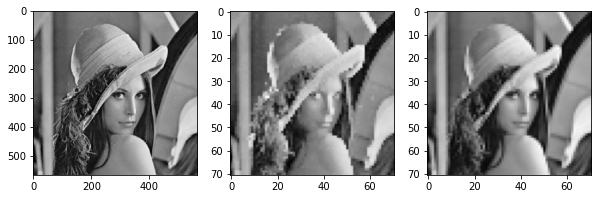

In [31]:
img1 = cv2.imread('./img/lena.png',0)
maxpool = pool2d(img1,(8,8),'max')
avgpool = pool2d(img1,(8,8),'avg')
fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img1,cmap='gray')
axs[1].imshow(maxpool,cmap='gray')
axs[2].imshow(avgpool,cmap='gray')

Invarianvce to local translation can be very useful property if we care more about whether some feature is presented than exactly where it is. For example, when determining whether an image contains a face, we need not know the location of the eyes with pixel-perfect accuracy., we just need to know that there is eyes on the left and right side of the face. In other contexts, it is more important to preserve the location of a feature.

### Padding

One observation is that the convolution operation reduces the size of $(q+1)$th layer in comparsion with the size of the $q$th layer. This type of reduction in size is not desirable in general, because it tends to lose some information along the borders of the image (or feature map in the hidden layers). This problem can be resolved by using the padding. Kernel size in the layer $q$ denoted as $K_q$; in padding, one adds $(K_q-1)/2$ "pixels" all around the borders of the image-feature map in order to maintain the spatial footprint. Note that these pixels are really feature values in the case of the padding hidden layers. The value of each of each of these padded feature values is set to 0, irrespective of whether the input or the feature maps at the hidden layers are being padded. As a result, the spatial height and width of the input volume will both increase by $(K_q-1)$, which is exactly what they reduce by (in the output volume) after the convolution is performed. The padded portions do not contribute to the final dot product due to their values are set to 0.

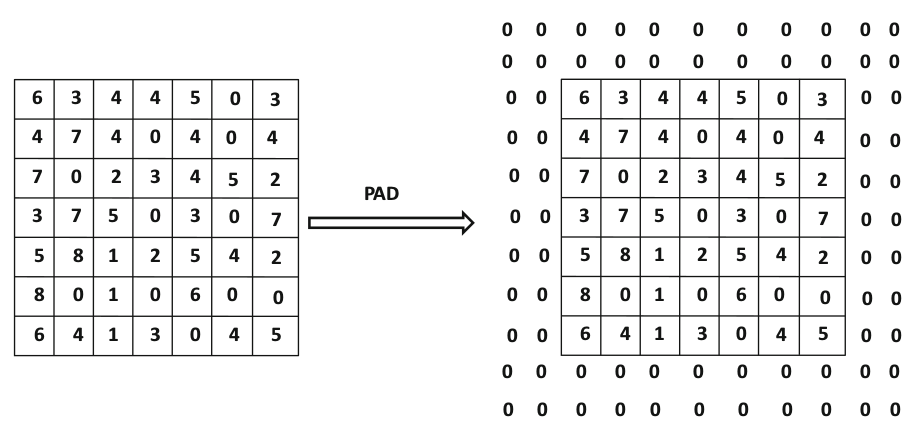

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/padding.png",width=700, height=500)

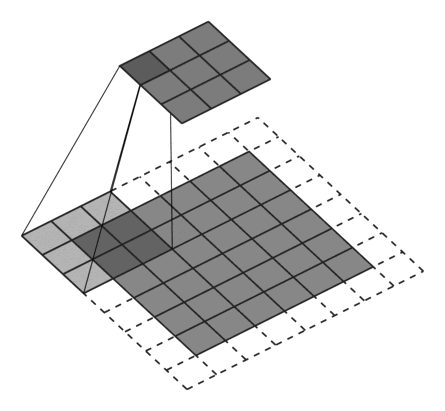

In [36]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/convwpad.png",width=400, height=400)

Look for *half padding*, *valid padding*, and *full padding*.

### Stride

There are other ways in which convolution can reduce the spatial footprint of the image. It is not necessary to perform the convolution at every spatial position in the layer. One can reduce the level of granularity of the convolution by using the notion of strides. When a stride of $S_q$ is used in the $q$th layer, the convolution is performed at the locations 1, $S_q+1$, $2S_q+1$, and so on along both spatial dimensions of the layer. The spatial size of the output on performing this convolution has height of $(H_q - K_q)/S_q + 1$ and a width of $(W_q - K_q)/S_q + 1$. \\
It is most common to use a stride of 1, although a stride of 2 is occasionally used as well. It is rare to use strides more than 2 in normal circumstances. Even though a stride of 4 was used in the input layer of the winning architecture of the ILSVRC (ImageNet Large Scale Visual Recognition Challenge) competition of 2012, the winning entry in the subsequent year reduced the stride to 2 to improve accuracy. Larger strides can be helpful in memory-constrained settings or to reduce overfitting if the spatial resolution is unnecessarily high. Strides have the effect of rapidly increasing the receptive field of each feature in the hidden layer, while reducing the spatial footprint of the entire layer.

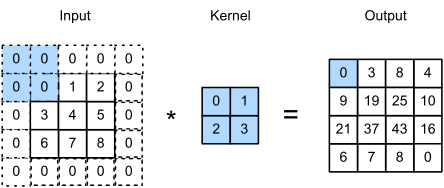

In [37]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/stride.png",width=400, height=400)

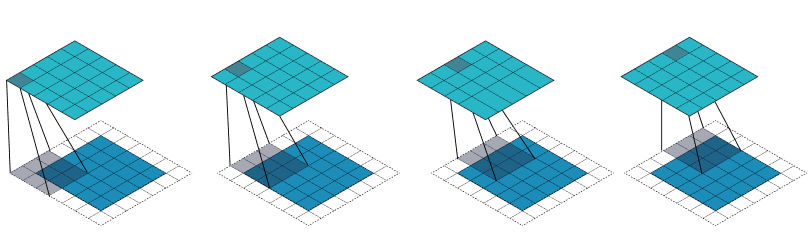

In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/stride2.png",width=900, height=900)

### The ReLU Layer

Nonlinear activation functions are preferred as they allow the nodes to learn more complex structures in the data. Traditionally, two widely used nonlinear activation functions are the sigmoid and hyperbolic tangent activation functions. The sigmoid activation function, also called the logistic function, is traditionally a very popular activation function for neural networks. The input to the function is transformed into a value between 0.0 and 1.0. Inputs that are much larger than 1.0 are transformed to the value 1.0, similarly, values much smaller than 0.0 are snapped to 0.0. The shape of the function for all possible inputs is an S-shape from zero up through 0.5 to 1.0. For a long time, through the early 1990s, it was the default activation used on neural networks. The hyperbolic tangent function, or tanh for short, is a similar shaped nonlinear activation function that outputs values between -1.0 and 1.0. In the later 1990s and through the 2000s, the tanh function was preferred over the sigmoid activation function as models that used it were easier to train and often had better predictive performance. A general problem with both the sigmoid and tanh functions is that they saturate. This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively. Further, the functions are only really sensitive to changes around their mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh. The limited sensitivity and saturation of the function happen regardless of whether the summed activation from the node provided as input contains useful information or not. Once saturated, it becomes challenging for the learning algorithm to continue to adapt the weights to improve the performance of the model.

The concolution operator is interleaved with the pooling and ReLU operations. The ReLU is not very different from how it is applied in traditional neural networks. For each of the $W_q \times H_q \times D_q$ values in a layer, the ReLU activation function is applied to it to create $W_q \times H_q \times D_q$ thresholded values. These values are then passed onto the next layer. Therefore applying ReLU does not change the dimensions of a layer because it is a simple one-to-one mapping of activation values. The purpose of applying the rectifier function is to increase the non-linearity in our images. The reason we want to do that is that images are naturally non-linear. When you look at any image, you'll find it contains a lot of non-linear features (e.g. the transition between pixels, the borders, the colors, etc.). ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLU is to introduce non-linearity in our ConvNet, since most of the real-world data we would want our ConvNet to learn would be non-linear (Convolution is a linear operation – element wise matrix multiplication and addition, so we account for non-linearity by introducing a non-linear function like ReLU).

### Fully Connected Layers and Classification

Each feature in the final spatial layer is connected to each hidden state in the first fully connected layer. This layer functions in exactly the same way as a traditional feed forward network. In most cases, one might use more than one fully connected layer to increase the power of the computations towards the end. The connections among these layers are exactly structured like a traditional feed forward networks. Since the fully connected layers are densely connected, the vast majority of parameters lie in the fully connected layers. For example, if each of two fully connected layers has 4096 hidden units, the the connections between them have more than 16 million weights.
The output layer of CNN is designed in an applicatio-specific way. In the following, we will consider the representative application of classification. In a such case, the output layer is fully connected to every neuron in the penultimate layer, and has a weight associated with it. One might use the logistic, softmax, or linear activation depending on the nature of the application.
Flattening the final feature map can be viewed as, transforming image $W \times H \times D$ matrix into $ 1 \times (W \times H \times D)$ array. This means, first fully connected layer has $W \times H \times D$ neurons in it. In fully connected layers, we are classifying feature extracted inputs. For example we have an data that has handwritten digits, from 0 to 9. And final convolution layer generates 10 feature map with size of $7\times7$. This means, we have $7\times7\times10 = 490$ neurons in first fully connected layer. And in the last fully connected layer, output layer, we have 10 neurons to classify digits from 0 to 9. 

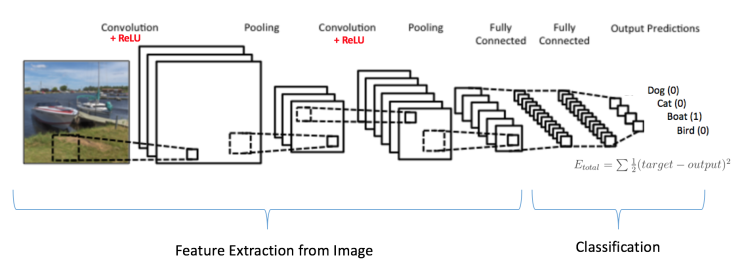

In [42]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/fullyc.png",width=900, height=900)

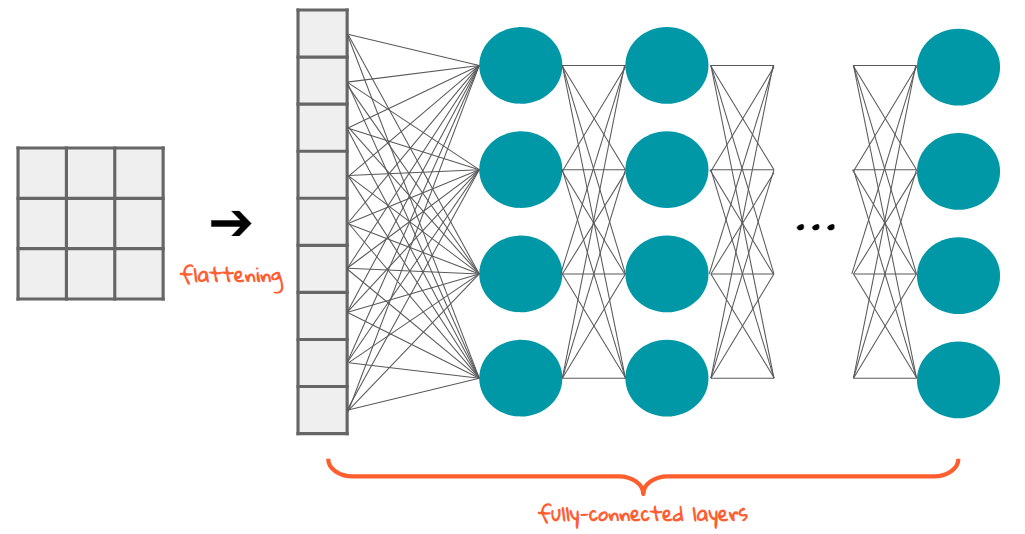

In [44]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/flattening.png",width=500, height=500)

## Lab.

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        # grayscale has 1 channel + 8 filters + 3x3 filter
        # same padding = (filter size - 1)/2 -> (3 -1)/2 = 1 
        # same padding -> input size = output size
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        # output size of each feature map = 
        # ((input size - filter size + 2(padding))/(stride) + 1) -> (28 - 3 + 2)/1 + 1 = 28
        self.batch_norm1 = nn.BatchNorm2d(8) # feature map = 8
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2)
        # the output size will be = 28/2 = 14
        # same padding= (filter size - 1)/2 -> (5-1)/2 = 2
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        # output size of each feature map = 
        # ((input size - filter size + 2(padding))/(stride) + 1) -> (14 - 5 + 2*2)/1 + 1 = 14
        self.batch_norm2 = nn.BatchNorm2d(32)
        """there are a maxpooling again filter size = 2x2"""
        """so output size is now 14/2 = 7 """
        # 32 feature map flatten (output size = 7x7):
        # 7*7*32 = 1568
        self.fc1 = nn.Linear(1568,600)
        self.dropout = nn.Dropout(p = 0.5)
        self.fc2 = nn.Linear(600,10)
    
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batch_norm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batch_norm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        # flattening:
        out = out.view(-1,1568) #(batch_size,1568) == (100,1568) == (-1,1568) -1 is flexible
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [3]:
mean = 0.1307
std = 0.3081
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((mean,),(std,))])

training_dataset = datasets.MNIST(root='/media/safak/Data/Desktop HDD/Deep Learning/PyTorch/CNN',
                               train = True,transform = transform, download = True)
test_dataset = datasets.MNIST(root='/media/safak/Data/Desktop HDD/Deep Learning/PyTorch/CNN',
                               train = False,transform = transform)


tensor(0)


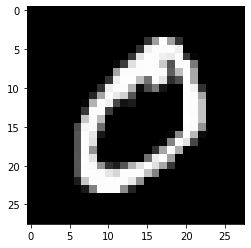

In [4]:
random_img = training_dataset.train_data[1].numpy() * std + mean
plt.imshow(random_img.reshape(28,28),cmap='gray')
print(training_dataset.train_labels[1])

In [5]:
def showData(col,row,train):
    fig = plt.figure(figsize=(15,15))
    plt.title('Random Images From Train Dataset',loc='left')
    #plt.rcParams['axex.titlepad'] = 10
    for i in range(1,col*row + 1):
        rand_label = np.random.randint(len(train.train_data))
        img = train.train_data[rand_label]
        fig.add_subplot(row,col,i)
        fig.set_figheight(7)
        fig.set_figwidth(9)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.show()

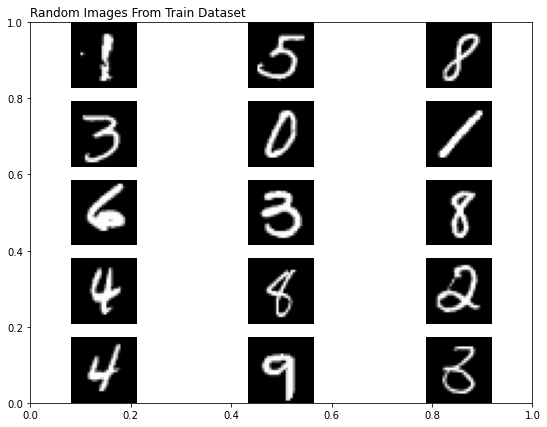

In [6]:
showData(3,5,training_dataset)

In [7]:
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset = training_dataset,
                                             batch_size = batch_size,
                                             shuffle = True)
test_load = torch.utils.data.DataLoader(dataset = test_dataset,
                                              batch_size = batch_size,
                                              shuffle = True)
print(len(training_dataset))
print(len(train_load))
print(len(test_dataset))
print(len(test_load))

60000
600
10000
100


In [8]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
print(CUDA)

True


In [9]:
epochs = 10
training_loss = []
training_accuracy= []
test_loss = []
test_accuracy = []

for epoch in range(epochs):
    correct = 0
    iterations = 0
    each_loss = 0.0

    model.train()
    for i,(inputs, targets) in enumerate(train_load):
        if CUDA: 
            inputs = inputs.cuda()
            targets = targets.cuda()
        outputs = model.forward(inputs)
        loss = criterion(outputs, targets)
        each_loss+=loss.item() # extract the value from tensor

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted=torch.max(outputs,1)
        correct += (predicted == targets).sum().item()
        iterations += 1
    training_loss.append(each_loss/iterations)
    training_accuracy.append(100 * correct/len(training_dataset))

    #now we test:
    each_loss_test = 0.0
    iterations = 0 
    correct = 0
    model.eval()
    for i,(inputs, targets) in enumerate(test_load):
        if CUDA: 
            inputs = inputs.cuda()
            targets = targets.cuda()
        outputs = model.forward(inputs)
        loss = criterion(outputs, targets)
        each_loss_test+=loss.item() # extract the value from tensor

        _, predicted=torch.max(outputs,1)
        correct += (predicted == targets).sum().item()
        iterations += 1

    test_loss.append(each_loss_test/iterations)
    test_accuracy.append(100 * correct/len(test_dataset))
    print("Epoch {}/{} - Training Loss: {:.3f} - Training Accuracy: {:.3f} - Test Loss: {:.3f} - Test Accuracy: {:.3f}"
          .format(epoch+1,epochs,training_loss[-1],training_accuracy[-1],test_loss[-1],test_accuracy[-1]))

Epoch 1/10 - Training Loss: 0.362 - Training Accuracy: 90.565 - Test Loss: 0.051 - Test Accuracy: 98.360
Epoch 2/10 - Training Loss: 0.103 - Training Accuracy: 97.055 - Test Loss: 0.051 - Test Accuracy: 98.390
Epoch 3/10 - Training Loss: 0.079 - Training Accuracy: 97.703 - Test Loss: 0.031 - Test Accuracy: 98.990
Epoch 4/10 - Training Loss: 0.068 - Training Accuracy: 98.012 - Test Loss: 0.036 - Test Accuracy: 98.860
Epoch 5/10 - Training Loss: 0.062 - Training Accuracy: 98.207 - Test Loss: 0.029 - Test Accuracy: 99.070
Epoch 6/10 - Training Loss: 0.056 - Training Accuracy: 98.415 - Test Loss: 0.030 - Test Accuracy: 99.210
Epoch 7/10 - Training Loss: 0.055 - Training Accuracy: 98.442 - Test Loss: 0.034 - Test Accuracy: 99.090
Epoch 8/10 - Training Loss: 0.051 - Training Accuracy: 98.520 - Test Loss: 0.031 - Test Accuracy: 99.080
Epoch 9/10 - Training Loss: 0.049 - Training Accuracy: 98.652 - Test Loss: 0.039 - Test Accuracy: 98.820
Epoch 10/10 - Training Loss: 0.049 - Training Accuracy:

"\nfig = plt.figure(figsize=(5,5))\nplt.plot(training_loss,label = 'Train Loss')\nplt.plot(test_loss,label='Test Loss')\nplt.legend()\nplt.xlabel('Iterations')\nplt.ylabel('Loss')\nplt.show()\n\nfig = plt.figure(figsize=(5,5))\nplt.plot(training_accuracy,label = 'Train Accuracy')\nplt.plot(test_accuracy,label='Test Accuracy')\nplt.legend()\nplt.xlabel('Iterations')\nplt.ylabel('Accuracy')\nplt.show()\n"

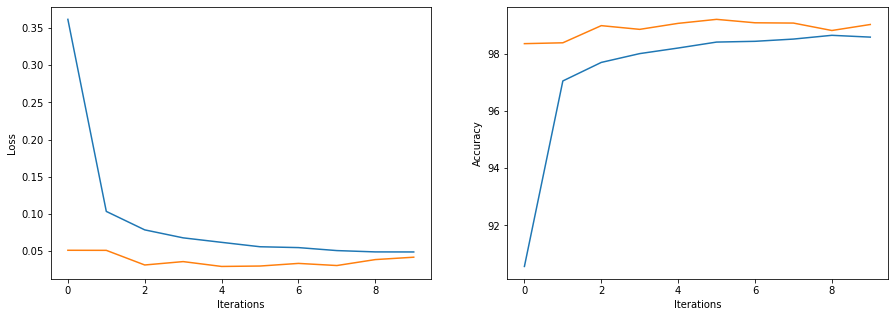

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(training_loss,label = 'Train Loss');
axs[0].plot(test_loss,label='Test Loss');
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')
axs[1].plot(training_accuracy,label = 'Train Accuracy');
axs[1].plot(test_accuracy,label='Test Accuracy');
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')

"""
fig = plt.figure(figsize=(5,5))
plt.plot(training_loss,label = 'Train Loss')
plt.plot(test_loss,label='Test Loss')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

fig = plt.figure(figsize=(5,5))
plt.plot(training_accuracy,label = 'Train Accuracy')
plt.plot(test_accuracy,label='Test Accuracy')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
"""

torch.Size([1, 1, 28, 28])
Predicted: 9
Real Value: tensor(9, device='cuda:0')


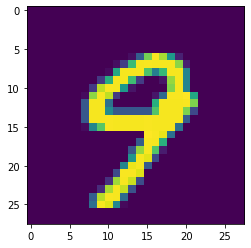

In [11]:
rand_label = np.random.randint(len(test_dataset))
img = test_dataset[rand_label][0].resize_((1,1,28,28))
imgshow = img.clone().detach()
plt.imshow(imgshow.resize_((28,28)).numpy())
label = test_dataset[rand_label][1]
model.eval()
if CUDA:
    model = model.cuda()
    label = label.cuda()
    img = img.cuda()
print(img.shape)
out = model.forward(img)

_,predicted = torch.max(out,1)
print("Predicted:",predicted.item())
print("Real Value:",label)

tensor([[-17.3853,  -6.1535,  -0.5609,  18.8447, -15.6812,   2.4892, -16.3767,
           3.4169,  -9.7763,  -2.8773]], device='cuda:0',
       grad_fn=<AddmmBackward>)
tensor([[-17.3853,  -6.1535,  -0.5609,  18.8447, -15.6812,   2.4892, -16.3767,
           3.4169,  -9.7763,  -2.8773]], device='cuda:0')
The number is:  3


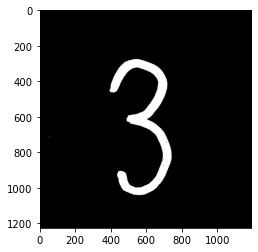

In [12]:
import cv2 
from PIL import Image
transforms_photo = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,),(std,))])
def predict_yours(img_name: str, model):
    img = cv2.imread(img_name,0)
    #ret, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ret3,threshold = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img = 255 - threshold
    plt.imshow(img,cmap='gray')
    img = Image.fromarray(img)
    img = transforms_photo(img)
    img = img.view((1,1,28,28))

    model.eval()
    if CUDA:
        model = model.cuda()
        img = img.cuda()
    out = model.forward(img)
    print(out)
    print(out.data)
    _, predd = torch.max(out,1)
    return predd.item()
pred = predict_yours('./img/3.jpg', model)
print("The number is: ",pred)

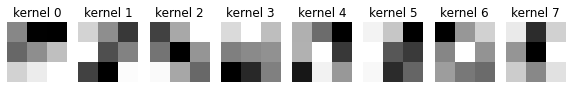

In [94]:
def showKernels(kernel_tensor, num_cols = 6, figsize=(10,10)):
    nkernels = kernel_tensor.shape[0]
    num_rows =  1 + nkernels//num_cols
    fig = plt.figure(figsize=figsize)
    for kernel in range(0,nkernels):
        ax1 = fig.add_subplot(num_rows,num_cols,kernel+1)
        ax1.imshow(kernel_tensor[kernel][0,:,:], cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_title('kernel {}'.format(kernel))
    plt.show()


filters = model.modules();
model_layers = [i for i in model.children()]
conv1 = model_layers[0]
conv2 = model_layers[4]
conv1_kernels = first_layer.cpu().weight.data.numpy()
conv2_kernels = second_layer.cpu().weight.data.numpy()
showKernels(conv1_kernels,8)

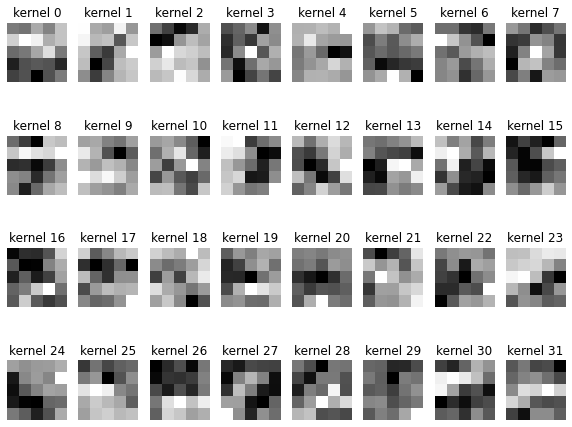

In [95]:
showKernels(conv2_kernels,8)